# `percolating_porosity`

This function computes the fraction of the void space which percolates along a given axis or between specified inlets and outlets.

In [9]:
import matplotlib.pyplot as plt
import numpy as np

import porespy as ps

## `im`

The image of the void space to analyze

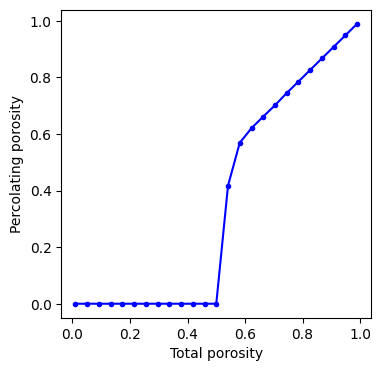

In [18]:
eps = np.linspace(0.01, 0.99, 25)
perc = []
for e in eps:
    im = ps.generators.blobs([100, 100], porosity=e, seed=2)
    tmp = ps.metrics.percolating_porosity(im)
    perc.append(tmp)
fig, ax = plt.subplots(figsize=[4, 4])
ax.plot(eps, perc, 'b.-')
ax.set_xlabel('Total porosity')
ax.set_ylabel('Percolating porosity');

## `axis` vs `inlets` and `outlets`

Since percolation is direction dependent it is necessary to specify the axis along which percolation should be checked. The default is `axis=0`, but this can be set to `1` or `2`.  Alternatively it is possible to specify `inlets` and `outlets` as a pair of boolean images with `True` values indicate the inlet and outlet pixels/voxels.  For instance consider the following image which percolates from left to right, but not top to bottom:

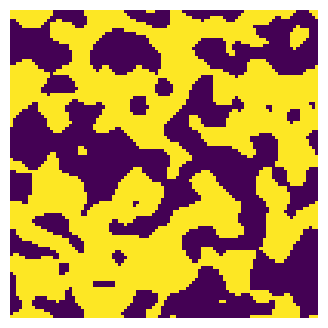

In [72]:
im = ps.generators.blobs([100, 100], porosity=0.55, seed=5)
fig, ax = plt.subplots(figsize=[4, 4])
ax.imshow(im)
ax.axis(False);

In [24]:
eps_0 = ps.metrics.percolating_porosity(im, axis=0)
eps_1 = ps.metrics.percolating_porosity(im, axis=1)

print(f"The percolating porosity in the x and y directions is {eps_0} and {eps_1}")

The percolating porosity in the x and y directions is 0.0 and 0.2621


## `conn`

The `conn` argument can be set to `min` or `max` and controls how pixels must be connected when looking for percolation.  For `min` this means 4 and 8 neighbors in 2D and 3D respectively, while `max` means 8 and 26 for 3D.

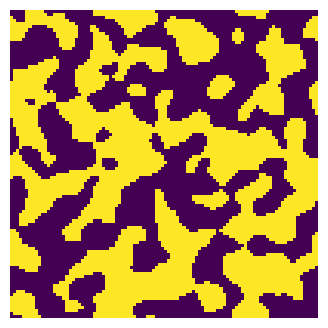

In [71]:
im = ps.generators.blobs([100, 100], porosity=0.5, seed=4)
fig, ax = plt.subplots(figsize=[4, 4])
ax.imshow(im)
ax.axis(False);

The above image has a cluster on the left side which is only connected to the percolating cluster via corners, so the percolating porosity will differ depending on the `conn` argument.

In [70]:
eps_min = ps.metrics.percolating_porosity(im, axis=1, conn='min')
eps_max = ps.metrics.percolating_porosity(im, axis=1, conn='max')

print(f"The percolating porosity in the x and y directions is {eps_min} and {eps_max}")

The percolating porosity in the x and y directions is 0.2703 and 0.3013
